In [1]:
import io
import pandas as pd
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pip install xgboost

In [2]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('ML.csv')
df

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,cash-in,30105,28942,494528,2019-07-19 14:40:00,1,type1
1,cash-in,30105,8692,494528,2019-05-17 14:57:00,1,type1
2,cash-in,30105,60094,494528,2019-07-20 13:20:00,1,type1
3,cash-in,30105,20575,494528,2019-07-03 14:15:00,1,type1
4,cash-in,30105,45938,494528,2019-05-26 10:40:00,1,type1
...,...,...,...,...,...,...,...
2335,transfer,14945,43793,106907,2019-03-29 14:53:00,0,none
2336,transfer,9532,43793,106907,2019-04-13 13:19:00,0,none
2337,transfer,27332,43793,106907,2019-05-10 09:34:00,0,none
2338,transfer,32685,43793,106907,2019-07-08 12:20:00,0,none


In [3]:
df2 = pd.read_csv('datawlabel.csv')
df2

,Id,indegree,outdegree,Degree,weighted indegree,weighted outdegree,Weighted Degree,Eccentricity,closnesscentrality,modularity_class,betweenesscentrality,isfraud
0,30105,1,20,21,6306849,9890569,16197418,1,1.0,133,0.000003,1
1,28942,1,0,1,494528,0,494528,0,0.0,133,0.000000,1
2,8692,1,0,1,494528,0,494528,0,0.0,133,0.000000,1
3,60094,2,0,2,1719336,0,1719336,0,0.0,133,0.000000,1
4,20575,1,0,1,494528,0,494528,0,0.0,133,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2813,14945,0,1,1,0,106907,106907,1,1.0,131,0.000000,0
2814,9532,0,1,1,0,106907,106907,1,1.0,131,0.000000,0
2815,27332,0,1,1,0,106907,106907,1,1.0,131,0.000000,0
2816,32685,0,1,1,0,106907,106907,1,1.0,131,0.000000,0


In [6]:
df['sourceid'].nunique()

1749

In [7]:
df['destinationid'].nunique()

1710

In [8]:
df2['isfraud'].value_counts()

0    1460
1    1358
Name: isfraud, dtype: int64

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2818 entries, 0 to 2817
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    2818 non-null   int64  
 1   indegree              2818 non-null   int64  
 2   outdegree             2818 non-null   int64  
 3   Degree                2818 non-null   int64  
 4   weighted indegree     2818 non-null   int64  
 5   weighted outdegree    2818 non-null   int64  
 6   Weighted Degree       2818 non-null   int64  
 7   Eccentricity          2818 non-null   int64  
 8   closnesscentrality    2818 non-null   float64
 9   modularity_class      2818 non-null   int64  
 10  betweenesscentrality  2818 non-null   float64
 11  isfraud               2818 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 264.3 KB


In [4]:
y = df2.iloc[:,-1:]
X = df2.iloc[:,:-1]

In [5]:
y

,isfraud
0,1
1,1
2,1
3,1
4,1
...,...
2813,0
2814,0
2815,0
2816,0


In [6]:
X

,Id,indegree,outdegree,Degree,weighted indegree,weighted outdegree,Weighted Degree,Eccentricity,closnesscentrality,modularity_class,betweenesscentrality
0,30105,1,20,21,6306849,9890569,16197418,1,1.0,133,0.000003
1,28942,1,0,1,494528,0,494528,0,0.0,133,0.000000
2,8692,1,0,1,494528,0,494528,0,0.0,133,0.000000
3,60094,2,0,2,1719336,0,1719336,0,0.0,133,0.000000
4,20575,1,0,1,494528,0,494528,0,0.0,133,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2813,14945,0,1,1,0,106907,106907,1,1.0,131,0.000000
2814,9532,0,1,1,0,106907,106907,1,1.0,131,0.000000
2815,27332,0,1,1,0,106907,106907,1,1.0,131,0.000000
2816,32685,0,1,1,0,106907,106907,1,1.0,131,0.000000


In [7]:
minmaxscale = MinMaxScaler()
X = minmaxscale.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, 
                                                    train_size=.80)

In [15]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression(solver='lbfgs', max_iter=2000)
clf2.fit(X_train, y_train)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=2000)

              precision    recall  f1-score   support

     class 0       0.79      0.75      0.77       290
     class 1       0.75      0.78      0.77       274

    accuracy                           0.77       564
   macro avg       0.77      0.77      0.77       564
weighted avg       0.77      0.77      0.77       564



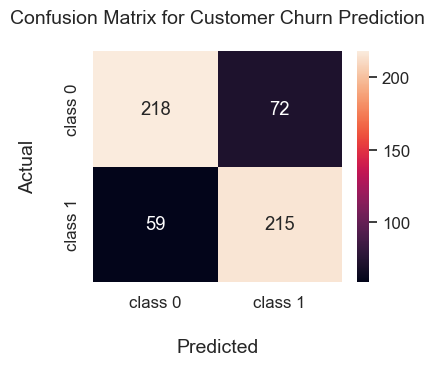

In [16]:
y_pred2 = clf2.predict(X_test)
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred2, target_names=target_names))

cf_matrix2=confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(4,3), dpi=100)
sns.set(font_scale = 1.1)
ax = sns.heatmap(cf_matrix2, annot=True, fmt='d', )
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(target_names)
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(target_names)
ax.set_title("Confusion Matrix for Customer Churn Prediction", fontsize=14, pad=20)
plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=9, random_state=0)
clf.fit(X_train, y_train)

C:\Users\PC\AppData\Local\Temp\ipykernel_11328\3183614808.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=9, random_state=0)

              precision    recall  f1-score   support

     class 0       0.98      0.96      0.97       290
     class 1       0.96      0.97      0.97       274

    accuracy                           0.97       564
   macro avg       0.97      0.97      0.97       564
weighted avg       0.97      0.97      0.97       564



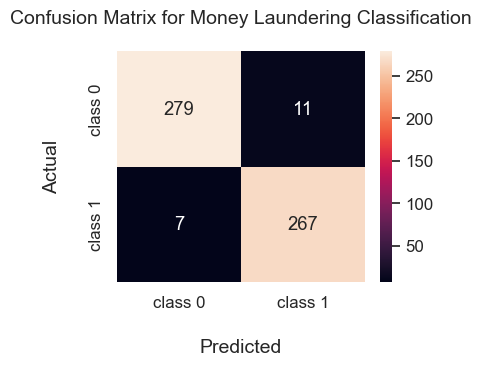

In [18]:
y_pred = clf.predict(X_test)
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

cf_matrix1=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3), dpi=100)
sns.set(font_scale = 1.1)
ax = sns.heatmap(cf_matrix1, annot=True, fmt='d', )
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(target_names)
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(target_names)
ax.set_title("Confusion Matrix for Money Laundering Classification", fontsize=14, pad=20)
plt.show()

In [19]:
parameters = {
    'learning_rate': [0.01, 0.02, 0.03, 0.04,0.05,0.06,0.07,0.08,0.09,0.1],
    # 'gamma':[0,1,5],
    # 'subsample':[0.8, 0.9, 1],
    # 'colsample_bytree':[0.8, 0.9, 1]
    
}

estimator = xgb.XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42,
    scale_pos_weight=1, 
    colsample_bytree = 1,
    subsample = 0.8,
    n_estimators=1000, 
    reg_alpha = 0.3,
    max_depth=14, 
    gamma=1
)

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'accuracy',
    n_jobs = 10,
    verbose=3
)

In [20]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=1, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=14,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=1000, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                           0.07, 0.08, 0.09, 0.1]},
             scoring='accuracy', verbose=3)

In [21]:
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=14, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

In [22]:
xgb_model = xgb.XGBClassifier(learning_rate =0.1,
                             n_estimators=1000,
                             max_depth=14,
                             min_child_weight=1,
                             gamma=1,
                             subsample=0.8,
                             colsample_bytree=0.8,
                             objective= 'binary:logistic',
                             nthread=4,
                             scale_pos_weight=1,
                             seed=27)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[279  11]
 [  5 269]]


              precision    recall  f1-score   support

     class 0       0.98      0.96      0.97       290
     class 1       0.96      0.98      0.97       274

    accuracy                           0.97       564
   macro avg       0.97      0.97      0.97       564
weighted avg       0.97      0.97      0.97       564



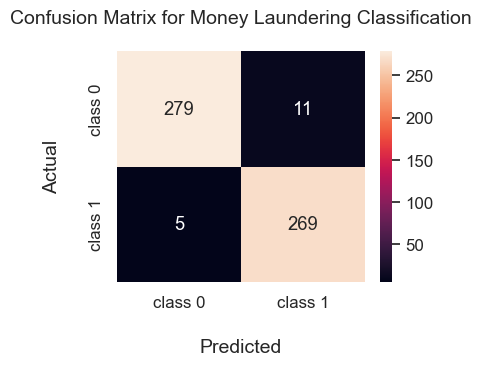

In [23]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

cf_matrix1=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3), dpi=100)
sns.set(font_scale = 1.1)
ax = sns.heatmap(cf_matrix1, annot=True, fmt='d', )
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(target_names)
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(target_names)
ax.set_title("Confusion Matrix for Money Laundering Classification", fontsize=14, pad=20)
plt.show()

In [24]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [25]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor

In [26]:
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:08<00:00,  3.31it/s]


In [27]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.97               0.97     0.97      0.97   
RandomForestClassifier             0.97               0.97     0.97      0.97   
XGBClassifier                      0.97               0.97     0.97      0.97   
BaggingClassifier                  0.97               0.97     0.97      0.97   
ExtraTreesClassifier               0.96               0.96     0.96      0.96   
DecisionTreeClassifier             0.96               0.96     0.96      0.96   
ExtraTreeClassifier                0.93               0.94     0.94      0.93   
AdaBoostClassifier                 0.91               0.91     0.91      0.91   
KNeighborsClassifier               0.90               0.90     0.90      0.90   
LabelSpreading                     0.88               0.88     0.88      0.88   
LabelPropagation            

In [12]:
from sklearn.ensemble import BaggingClassifier

In [13]:
model = BaggingClassifier()

In [16]:
model.fit(X_train, y_train)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier()

In [17]:
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

     class 0       0.96      0.96      0.96       290
     class 1       0.95      0.96      0.96       274

    accuracy                           0.96       564
   macro avg       0.96      0.96      0.96       564
weighted avg       0.96      0.96      0.96       564



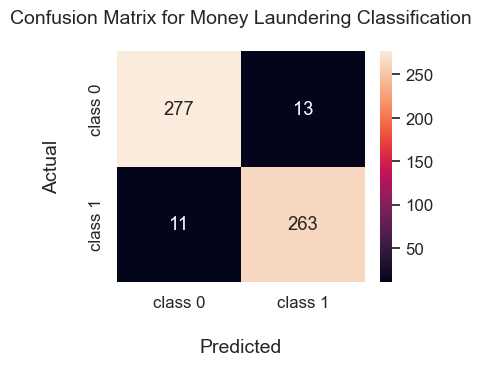

In [18]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

cf_matrix1=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3), dpi=100)
sns.set(font_scale = 1.1)
ax = sns.heatmap(cf_matrix1, annot=True, fmt='d', )
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(target_names)
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(target_names)
ax.set_title("Confusion Matrix for Money Laundering Classification", fontsize=14, pad=20)
plt.show()

In [10]:
import lightgbm as lgb

In [12]:
model_lgbm = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model_lgbm.fit(X_train, y_train)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PC\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

              precision    recall  f1-score   support

     class 0       0.98      0.97      0.97       290
     class 1       0.97      0.98      0.97       274

    accuracy                           0.97       564
   macro avg       0.97      0.97      0.97       564
weighted avg       0.97      0.97      0.97       564



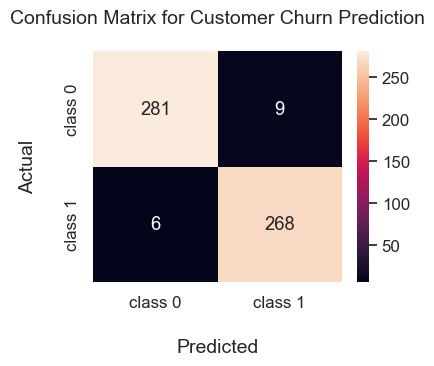

In [14]:
y_pred = model_lgbm.predict(X_test)
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

cf_matrix2=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3), dpi=100)
sns.set(font_scale = 1.1)
ax = sns.heatmap(cf_matrix2, annot=True, fmt='d', )
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(target_names)
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(target_names)
ax.set_title("Confusion Matrix for Suspicious Financial Transaction Prediction", fontsize=14, pad=20)
plt.show()